<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/XOR_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

Train and Test are the same in this exercise 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))


In [28]:
model.compile(
  #optimizer='adam',
  optimizer=SGD(lr=0.1),
  # loss='categorical_crossentropy',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 12)                36        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 13        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(inputs, expected_output, batch_size=1, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1453 - acc: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1351 - acc: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1241 - acc: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1123 - acc: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1021 - acc: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0955 - acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0893 - acc: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0868 - acc: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0807 - acc: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0720 - acc: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0673 - acc: 1.00

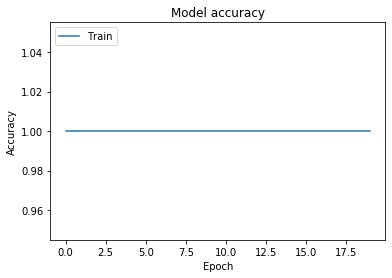

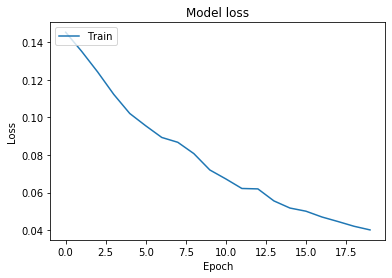

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
model.evaluate(
  inputs,
  expected_output
)


4/4 [==============================] - 0s 1ms/step


[0.03712083399295807, 1.0]

In [39]:
# Predict on the first 5 test images.
predictions = model.predict(inputs)

predictions

array([[0.0430859 ],
       [0.97700083],
       [0.9732281 ],
       [0.05260307]], dtype=float32)

In [32]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
#print(inputs[:5]) # [7, 2, 1, 0, 4]

[0 0 0 0]
